In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [4]:
df_1 = df[df['txn_description']=='PAY/SALARY'].groupby('customer_id').mean()

In [5]:
df_1.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [6]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_1.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [7]:
df_2 = df.groupby("customer_id").mean()
df_2.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


## Simple Linear Regression Model

In [10]:
df_2.drop(['card_present_flag','merchant_code'],1, inplace=True)

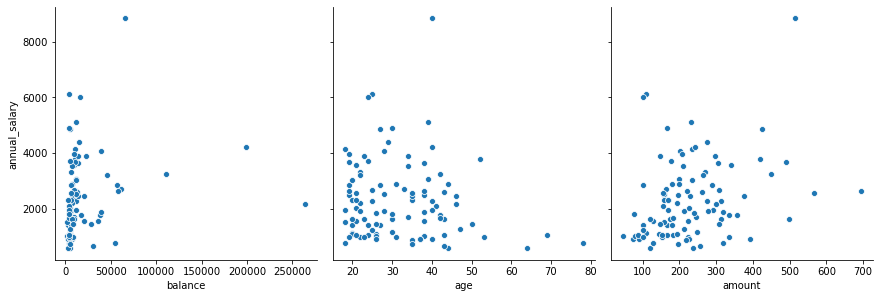

In [12]:
sns.pairplot(df_2, x_vars=['balance','age','amount'], y_vars='annual_salary',size=4, aspect=1, kind='scatter')
plt.show()

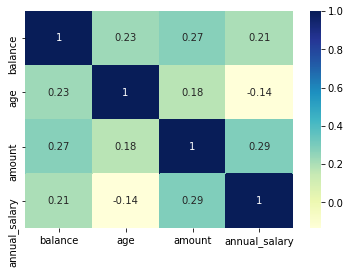

In [13]:
sns.heatmap(df_2.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [15]:
X = df_2[['balance', 'age', 'amount']]
y = df_2['annual_salary']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [18]:
import statsmodels.api as sm


In [19]:
X_train_sm = sm.add_constant(X_train)

In [20]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
lr.params

const      2239.483953
balance       0.006928
age         -33.498745
amount        3.982440
dtype: float64

In [22]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:          annual_salary   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     6.211
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           0.000881
Time:                        17:40:31   Log-Likelihood:                -596.66
No. Observations:                  70   AIC:                             1201.
Df Residuals:                      66   BIC:                             1210.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2239.4840    492.012      4.552      0.0

In [23]:
y_train_pred = lr.predict(X_train_sm)

In [24]:
X_test_sm= sm.add_constant(X_test)

In [25]:
y_test_pred = lr.predict(X_test_sm)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

-0.03430103060381162

In [28]:
r_squareds = r2_score(y_train, y_train_pred)
r_squareds

0.2201673008737527

## Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
reg = DecisionTreeRegressor()

In [42]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
reg.score(X_train, y_train)

1.0

In [43]:
reg.predict(X_test)

array([1272., 2639., 1626., 1952., 2718., 2718.,  920.,  596., 1436.,
        576., 1002., 2500., 3026., 2639., 2639., 2718., 4863., 2854.,
       1225., 1952., 1002., 1843., 2718.,  596., 2588., 2588., 3712.,
        982., 3712., 2320.])

In [44]:
reg.score(X_test, y_test)

-0.045335040380210856